In [1]:
###### 该板块主要对数据中的缺失值进行填充 ##############

In [3]:
import numpy as np
import pandas as pd
from numpy.linalg import svd

In [3]:
def fill_missing_values_with_svd(matrix, rank=5, max_iter=100, tol=1e-5, flag=None):
    """
    使用 SVD 填充矩阵中的缺失值。
    
    参数:
    matrix (numpy.ndarray): 包含缺失值的矩阵，缺失值用 np.nan 表示。
    max_iter (int): 最大迭代次数。
    tol (float): 收敛容忍度。
    
    返回:
    filled_matrix (numpy.ndarray): 填充后的矩阵。
    """
    #### 根据行和列的缺失值情况选择合适的方法进行填充，也可以使用0进行填充 ################
    matrix = np.array(matrix)
    nan_mask = np.isnan(matrix)
    if flag == 'mean':
        # 计算整个矩阵的均值
        global_mean = np.nanmean(matrix)
        # 使用全局均值填充缺失值
        filled_matrix = np.where(nan_mask, global_mean, matrix)
    else:
        filled_matrix = np.where(nan_mask, 0, matrix)
    
    for iteration in range(max_iter):
        # 奇异值分解
        U, s, Vt = svd(filled_matrix, full_matrices=False)
        
        # 低秩近似：保留前 rank 个奇异值
        U_k = U[:, :rank]
        S_k = np.diag(s[:rank])
        Vt_k = Vt[:rank, :]
        
        filled_matrix_new = np.dot(U_k, np.dot(S_k, Vt_k))
        # 仅更新缺失值
        filled_matrix[nan_mask] = filled_matrix_new[nan_mask]
        
        # 检查收敛性
        if np.linalg.norm(filled_matrix - filled_matrix_new, ord='fro') < tol:
            print(f"Converged in {iteration + 1} iterations.")
            break
    
    return filled_matrix

In [1]:
#### 对miRNA的基于表达的相似度矩阵进行缺失值处理 #################

In [52]:
### 基于基因表达的相似性
miRNA_ex = pd.read_csv('/home/lichangyong/Documents/zyf/machine_learning/Dask1/data/similarity/normalized_toni_exp.txt',sep='\t',index_col=0)

In [53]:
miRNA_ex

,hsa-let-7a,hsa-let-7a-1,hsa-let-7a-2,hsa-let-7a-3,hsa-let-7b,hsa-let-7c,hsa-let-7d,hsa-let-7e,hsa-let-7f,hsa-let-7f-1,...,hsa-mir-937,hsa-mir-939,hsa-mir-940,hsa-mir-942,hsa-mir-944,hsa-mir-95,hsa-mir-96,hsa-mir-98,hsa-mir-99a,hsa-mir-99b
hsa-let-7a,1.000000,1.000000,-0.036109,1.000000,0.085642,0.009964,0.016145,0.054644,0.653256,-0.036412,...,-0.036237,-0.036413,-0.035909,-0.036320,-0.036379,-0.036318,-0.036337,-0.007017,-0.032524,0.092735
hsa-let-7a-1,1.000000,1.000000,-0.036109,1.000000,0.085642,0.009964,0.016145,0.054644,0.653256,-0.036412,...,-0.036237,-0.036413,-0.035909,-0.036320,-0.036379,-0.036318,-0.036337,-0.007017,-0.032524,0.092735
hsa-let-7a-2,-0.036109,-0.036109,1.000000,-0.036109,-0.190314,-0.090260,-0.184051,-0.240359,-0.055839,0.999887,...,0.999926,0.999890,0.999831,0.999923,0.999846,0.999744,0.999740,0.173463,0.970503,-0.214926
hsa-let-7a-3,1.000000,1.000000,-0.036109,1.000000,0.085642,0.009964,0.016145,0.054644,0.653256,-0.036412,...,-0.036237,-0.036413,-0.035909,-0.036320,-0.036379,-0.036318,-0.036337,-0.007017,-0.032524,0.092735
hsa-let-7b,0.085642,0.085642,-0.190314,0.085642,1.000000,0.067193,0.110815,0.356161,0.095688,-0.191387,...,-0.190857,-0.191392,-0.189604,-0.191111,-0.191283,-0.190959,-0.191180,-0.076990,-0.179234,0.403968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hsa-mir-95,-0.036318,-0.036318,0.999744,-0.036318,-0.190959,-0.088064,-0.184461,-0.241340,-0.055926,0.999872,...,0.999812,0.999854,0.999589,0.999847,0.999825,1.000000,0.999761,0.177005,0.971632,-0.215662
hsa-mir-96,-0.036337,-0.036337,0.999740,-0.036337,-0.191180,-0.090522,-0.184530,-0.241425,-0.056024,0.999845,...,0.999812,0.999839,0.999554,0.999839,0.999820,0.999761,1.000000,0.175364,0.970249,-0.215788
hsa-mir-98,-0.007017,-0.007017,0.173463,-0.007017,-0.076990,0.051471,0.056444,-0.032293,-0.003036,0.174076,...,0.174463,0.173858,0.174838,0.174065,0.174764,0.177005,0.175364,1.000000,0.193038,-0.032965
hsa-mir-99a,-0.032524,-0.032524,0.970503,-0.032524,-0.179234,-0.054573,-0.200406,-0.235438,-0.049172,0.969557,...,0.970083,0.969381,0.971738,0.969788,0.969411,0.971632,0.970249,0.193038,1.000000,-0.201160


In [ ]:
miRNA_ex.isnull().sum()

In [ ]:
# 使用零填充
miRNA_ex_0 = miRNA_ex.fillna(0,inplace=True)

In [19]:
# 使用svd进行填充
miRNA_ex_svd = fill_missing_values_with_svd(miRNA_ex, 2, 100, 1e-5, 'mean')

In [22]:
miRNA_ex_svd = pd.DataFrame(miRNA_ex_svd)
miRNA_ex_svd

,0,1,2,3,4,5,6,7,8,9,...,525,526,527,528,529,530,531,532,533,534
0,1.000000,1.000000,-0.036109,1.000000,0.085642,0.009964,0.016145,0.054644,0.653256,-0.036412,...,-0.036237,-0.036413,-0.035909,-0.036320,-0.036379,-0.036318,-0.036337,-0.007017,-0.032524,0.092735
1,1.000000,1.000000,-0.036109,1.000000,0.085642,0.009964,0.016145,0.054644,0.653256,-0.036412,...,-0.036237,-0.036413,-0.035909,-0.036320,-0.036379,-0.036318,-0.036337,-0.007017,-0.032524,0.092735
2,-0.036109,-0.036109,1.000000,-0.036109,-0.190314,-0.090260,-0.184051,-0.240359,-0.055839,0.999887,...,0.999926,0.999890,0.999831,0.999923,0.999846,0.999744,0.999740,0.173463,0.970503,-0.214926
3,1.000000,1.000000,-0.036109,1.000000,0.085642,0.009964,0.016145,0.054644,0.653256,-0.036412,...,-0.036237,-0.036413,-0.035909,-0.036320,-0.036379,-0.036318,-0.036337,-0.007017,-0.032524,0.092735
4,0.085642,0.085642,-0.190314,0.085642,1.000000,0.067193,0.110815,0.356161,0.095688,-0.191387,...,-0.190857,-0.191392,-0.189604,-0.191111,-0.191283,-0.190959,-0.191180,-0.076990,-0.179234,0.403968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,-0.036318,-0.036318,0.999744,-0.036318,-0.190959,-0.088064,-0.184461,-0.241340,-0.055926,0.999872,...,0.999812,0.999854,0.999589,0.999847,0.999825,1.000000,0.999761,0.177005,0.971632,-0.215662
531,-0.036337,-0.036337,0.999740,-0.036337,-0.191180,-0.090522,-0.184530,-0.241425,-0.056024,0.999845,...,0.999812,0.999839,0.999554,0.999839,0.999820,0.999761,1.000000,0.175364,0.970249,-0.215788
532,-0.007017,-0.007017,0.173463,-0.007017,-0.076990,0.051471,0.056444,-0.032293,-0.003036,0.174076,...,0.174463,0.173858,0.174838,0.174065,0.174764,0.177005,0.175364,1.000000,0.193038,-0.032965
533,-0.032524,-0.032524,0.970503,-0.032524,-0.179234,-0.054573,-0.200406,-0.235438,-0.049172,0.969557,...,0.970083,0.969381,0.971738,0.969788,0.969411,0.971632,0.970249,0.193038,1.000000,-0.201160


In [41]:
# 由于数据中包含一整行和一整列的缺失值，故使用全局均值来进行填充
miRNA_ex_globemean = miRNA_ex.copy()
miRNA_ex_globemean = np.array(miRNA_ex_globemean)
nan_mask = np.isnan(miRNA_ex_globemean)

# 计算整个矩阵的均值
global_mean = np.nanmean(miRNA_ex_globemean)
# 使用全局均值填充缺失值
filled_matrix = np.where(nan_mask, global_mean, miRNA_ex_globemean)
filled_matrix = pd.DataFrame(filled_matrix)
miRNA_ex_globemean = filled_matrix
miRNA_ex_globemean

,0,1,2,3,4,5,6,7,8,9,...,525,526,527,528,529,530,531,532,533,534
0,1.000000,1.000000,-0.036109,1.000000,0.085642,0.009964,0.016145,0.054644,0.653256,-0.036412,...,-0.036237,-0.036413,-0.035909,-0.036320,-0.036379,-0.036318,-0.036337,-0.007017,-0.032524,0.092735
1,1.000000,1.000000,-0.036109,1.000000,0.085642,0.009964,0.016145,0.054644,0.653256,-0.036412,...,-0.036237,-0.036413,-0.035909,-0.036320,-0.036379,-0.036318,-0.036337,-0.007017,-0.032524,0.092735
2,-0.036109,-0.036109,1.000000,-0.036109,-0.190314,-0.090260,-0.184051,-0.240359,-0.055839,0.999887,...,0.999926,0.999890,0.999831,0.999923,0.999846,0.999744,0.999740,0.173463,0.970503,-0.214926
3,1.000000,1.000000,-0.036109,1.000000,0.085642,0.009964,0.016145,0.054644,0.653256,-0.036412,...,-0.036237,-0.036413,-0.035909,-0.036320,-0.036379,-0.036318,-0.036337,-0.007017,-0.032524,0.092735
4,0.085642,0.085642,-0.190314,0.085642,1.000000,0.067193,0.110815,0.356161,0.095688,-0.191387,...,-0.190857,-0.191392,-0.189604,-0.191111,-0.191283,-0.190959,-0.191180,-0.076990,-0.179234,0.403968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,-0.036318,-0.036318,0.999744,-0.036318,-0.190959,-0.088064,-0.184461,-0.241340,-0.055926,0.999872,...,0.999812,0.999854,0.999589,0.999847,0.999825,1.000000,0.999761,0.177005,0.971632,-0.215662
531,-0.036337,-0.036337,0.999740,-0.036337,-0.191180,-0.090522,-0.184530,-0.241425,-0.056024,0.999845,...,0.999812,0.999839,0.999554,0.999839,0.999820,0.999761,1.000000,0.175364,0.970249,-0.215788
532,-0.007017,-0.007017,0.173463,-0.007017,-0.076990,0.051471,0.056444,-0.032293,-0.003036,0.174076,...,0.174463,0.173858,0.174838,0.174065,0.174764,0.177005,0.175364,1.000000,0.193038,-0.032965
533,-0.032524,-0.032524,0.970503,-0.032524,-0.179234,-0.054573,-0.200406,-0.235438,-0.049172,0.969557,...,0.970083,0.969381,0.971738,0.969788,0.969411,0.971632,0.970249,0.193038,1.000000,-0.201160


In [50]:
# 使用knn进行填充
from sklearn.impute import KNNImputer

In [62]:
# 创建 KNNImputer 对象
imputer = KNNImputer(n_neighbors=20)  # 设定 k 值

In [63]:
miRNA_ex_knn =  imputer.fit_transform(miRNA_ex)

In [66]:
miRNA_ex_knn = pd.DataFrame(miRNA_ex_knn)
miRNA_ex_knn

,0,1,2,3,4,5,6,7,8,9,...,471,472,473,474,475,476,477,478,479,480
0,1.000000,1.000000,-0.036109,1.000000,0.085642,0.009964,0.016145,0.054644,0.653256,-0.036412,...,-0.036237,-0.036413,-0.035909,-0.036320,-0.036379,-0.036318,-0.036337,-0.007017,-0.032524,0.092735
1,1.000000,1.000000,-0.036109,1.000000,0.085642,0.009964,0.016145,0.054644,0.653256,-0.036412,...,-0.036237,-0.036413,-0.035909,-0.036320,-0.036379,-0.036318,-0.036337,-0.007017,-0.032524,0.092735
2,-0.036109,-0.036109,1.000000,-0.036109,-0.190314,-0.090260,-0.184051,-0.240359,-0.055839,0.999887,...,0.999926,0.999890,0.999831,0.999923,0.999846,0.999744,0.999740,0.173463,0.970503,-0.214926
3,1.000000,1.000000,-0.036109,1.000000,0.085642,0.009964,0.016145,0.054644,0.653256,-0.036412,...,-0.036237,-0.036413,-0.035909,-0.036320,-0.036379,-0.036318,-0.036337,-0.007017,-0.032524,0.092735
4,0.085642,0.085642,-0.190314,0.085642,1.000000,0.067193,0.110815,0.356161,0.095688,-0.191387,...,-0.190857,-0.191392,-0.189604,-0.191111,-0.191283,-0.190959,-0.191180,-0.076990,-0.179234,0.403968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,-0.036318,-0.036318,0.999744,-0.036318,-0.190959,-0.088064,-0.184461,-0.241340,-0.055926,0.999872,...,0.999812,0.999854,0.999589,0.999847,0.999825,1.000000,0.999761,0.177005,0.971632,-0.215662
531,-0.036337,-0.036337,0.999740,-0.036337,-0.191180,-0.090522,-0.184530,-0.241425,-0.056024,0.999845,...,0.999812,0.999839,0.999554,0.999839,0.999820,0.999761,1.000000,0.175364,0.970249,-0.215788
532,-0.007017,-0.007017,0.173463,-0.007017,-0.076990,0.051471,0.056444,-0.032293,-0.003036,0.174076,...,0.174463,0.173858,0.174838,0.174065,0.174764,0.177005,0.175364,1.000000,0.193038,-0.032965
533,-0.032524,-0.032524,0.970503,-0.032524,-0.179234,-0.054573,-0.200406,-0.235438,-0.049172,0.969557,...,0.970083,0.969381,0.971738,0.969788,0.969411,0.971632,0.970249,0.193038,1.000000,-0.201160


In [67]:
# miRNA_ex_knn.to_csv('miRNA_ex_fill(knn)', sep='\t',header=False,index=False)

In [ ]:
#### 对miRNA的基于通路的相似度矩阵进行缺失值处理 #################

In [68]:
### 基于基因通路的相似性
miRNA_path = pd.read_csv('/home/lichangyong/Documents/zyf/machine_learning/Dask1/data/similarity/toni_path.txt',sep='\t',index_col=0)

In [69]:
miRNA_path

,hsa-let-7a,hsa-let-7a-1,hsa-let-7a-2,hsa-let-7a-3,hsa-let-7b,hsa-let-7c,hsa-let-7d,hsa-let-7e,hsa-let-7f,hsa-let-7f-1,...,hsa-mir-937,hsa-mir-939,hsa-mir-940,hsa-mir-942,hsa-mir-944,hsa-mir-95,hsa-mir-96,hsa-mir-98,hsa-mir-99a,hsa-mir-99b
hsa-let-7a,1.000000,NaN,0.462339,NaN,0.653367,0.703683,0.593230,0.645315,0.652345,0.468825,...,0.390029,0.513233,0.436275,0.473942,0.500196,0.428317,0.530729,0.652724,0.510305,0.452844
hsa-let-7a-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hsa-let-7a-2,0.462339,NaN,1.000000,NaN,0.511525,0.499871,0.747110,0.665835,0.714405,0.758867,...,0.748952,0.745487,0.759067,0.735824,0.754943,0.740843,0.538608,0.570176,0.649237,0.762840
hsa-let-7a-3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hsa-let-7b,0.653367,NaN,0.511525,NaN,1.000000,0.634040,0.638397,0.697248,0.675791,0.546244,...,0.453376,0.574084,0.501849,0.509665,0.568993,0.484093,0.487411,0.620229,0.571368,0.523041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hsa-mir-95,0.428317,NaN,0.740843,NaN,0.484093,0.441320,0.785744,0.676891,0.699613,0.739951,...,0.881881,0.721218,0.866918,0.749613,0.745862,1.000000,0.442376,0.556448,0.603932,0.741711
hsa-mir-96,0.530729,NaN,0.538608,NaN,0.487411,0.540095,0.504603,0.494975,0.537178,0.544935,...,0.393045,0.592817,0.420203,0.498742,0.557606,0.442376,1.000000,0.524599,0.549533,0.500593
hsa-mir-98,0.652724,NaN,0.570176,NaN,0.620229,0.723268,0.735025,0.696742,0.782768,0.604047,...,0.505201,0.614236,0.552239,0.595932,0.591018,0.556448,0.524599,1.000000,0.545620,0.542060
hsa-mir-99a,0.510305,NaN,0.649237,NaN,0.571368,0.535416,0.668636,0.660044,0.643795,0.658289,...,0.593350,0.687641,0.622445,0.635662,0.691061,0.603932,0.549533,0.545620,1.000000,0.710068


In [38]:
miRNA_path.isnull().sum()

hsa-let-7a       95
hsa-let-7a-1    535
hsa-let-7a-2     95
hsa-let-7a-3    535
hsa-let-7b       95
               ... 
hsa-mir-95       95
hsa-mir-96       95
hsa-mir-98       95
hsa-mir-99a      95
hsa-mir-99b      95
Length: 535, dtype: int64

In [39]:
# 使用零填充
miRNA_path.fillna(0, inplace=True)
miRNA_path

,hsa-let-7a,hsa-let-7a-1,hsa-let-7a-2,hsa-let-7a-3,hsa-let-7b,hsa-let-7c,hsa-let-7d,hsa-let-7e,hsa-let-7f,hsa-let-7f-1,...,hsa-mir-937,hsa-mir-939,hsa-mir-940,hsa-mir-942,hsa-mir-944,hsa-mir-95,hsa-mir-96,hsa-mir-98,hsa-mir-99a,hsa-mir-99b
hsa-let-7a,1.000000,0.0,0.462339,0.0,0.653367,0.703683,0.593230,0.645315,0.652345,0.468825,...,0.390029,0.513233,0.436275,0.473942,0.500196,0.428317,0.530729,0.652724,0.510305,0.452844
hsa-let-7a-1,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
hsa-let-7a-2,0.462339,0.0,1.000000,0.0,0.511525,0.499871,0.747110,0.665835,0.714405,0.758867,...,0.748952,0.745487,0.759067,0.735824,0.754943,0.740843,0.538608,0.570176,0.649237,0.762840
hsa-let-7a-3,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
hsa-let-7b,0.653367,0.0,0.511525,0.0,1.000000,0.634040,0.638397,0.697248,0.675791,0.546244,...,0.453376,0.574084,0.501849,0.509665,0.568993,0.484093,0.487411,0.620229,0.571368,0.523041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hsa-mir-95,0.428317,0.0,0.740843,0.0,0.484093,0.441320,0.785744,0.676891,0.699613,0.739951,...,0.881881,0.721218,0.866918,0.749613,0.745862,1.000000,0.442376,0.556448,0.603932,0.741711
hsa-mir-96,0.530729,0.0,0.538608,0.0,0.487411,0.540095,0.504603,0.494975,0.537178,0.544935,...,0.393045,0.592817,0.420203,0.498742,0.557606,0.442376,1.000000,0.524599,0.549533,0.500593
hsa-mir-98,0.652724,0.0,0.570176,0.0,0.620229,0.723268,0.735025,0.696742,0.782768,0.604047,...,0.505201,0.614236,0.552239,0.595932,0.591018,0.556448,0.524599,1.000000,0.545620,0.542060
hsa-mir-99a,0.510305,0.0,0.649237,0.0,0.571368,0.535416,0.668636,0.660044,0.643795,0.658289,...,0.593350,0.687641,0.622445,0.635662,0.691061,0.603932,0.549533,0.545620,1.000000,0.710068


In [17]:
# 使用svd进行填充
miRNA_path_svd = fill_missing_values_with_svd(miRNA_path, 2, 100, 1e-5, 'mean')

In [24]:
miRNA_path_svd = pd.DataFrame(miRNA_path_svd)
miRNA_path_svd

,0,1,2,3,4,5,6,7,8,9,...,525,526,527,528,529,530,531,532,533,534
0,1.000000,0.557355,0.462339,0.557355,0.653367,0.703683,0.593230,0.645315,0.652345,0.468825,...,0.390029,0.513233,0.436275,0.473942,0.500196,0.428317,0.530729,0.652724,0.510305,0.452844
1,0.557355,0.681044,0.655744,0.681044,0.574809,0.601431,0.673313,0.645329,0.687188,0.670573,...,0.558460,0.695709,0.594036,0.639581,0.666825,0.587078,0.606246,0.615413,0.639463,0.629471
2,0.462339,0.655744,1.000000,0.655744,0.511525,0.499871,0.747110,0.665835,0.714405,0.758867,...,0.748952,0.745487,0.759067,0.735824,0.754943,0.740843,0.538608,0.570176,0.649237,0.762840
3,0.557355,0.681044,0.655744,0.681044,0.574809,0.601431,0.673313,0.645329,0.687188,0.670573,...,0.558460,0.695709,0.594036,0.639581,0.666825,0.587078,0.606246,0.615413,0.639463,0.629471
4,0.653367,0.574809,0.511525,0.574809,1.000000,0.634040,0.638397,0.697248,0.675791,0.546244,...,0.453376,0.574084,0.501849,0.509665,0.568993,0.484093,0.487411,0.620229,0.571368,0.523041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,0.428317,0.587078,0.740843,0.587078,0.484093,0.441320,0.785744,0.676891,0.699613,0.739951,...,0.881881,0.721218,0.866918,0.749613,0.745862,1.000000,0.442376,0.556448,0.603932,0.741711
531,0.530729,0.606246,0.538608,0.606246,0.487411,0.540095,0.504603,0.494975,0.537178,0.544935,...,0.393045,0.592817,0.420203,0.498742,0.557606,0.442376,1.000000,0.524599,0.549533,0.500593
532,0.652724,0.615413,0.570176,0.615413,0.620229,0.723268,0.735025,0.696742,0.782768,0.604047,...,0.505201,0.614236,0.552239,0.595932,0.591018,0.556448,0.524599,1.000000,0.545620,0.542060
533,0.510305,0.639463,0.649237,0.639463,0.571368,0.535416,0.668636,0.660044,0.643795,0.658289,...,0.593350,0.687641,0.622445,0.635662,0.691061,0.603932,0.549533,0.545620,1.000000,0.710068


In [48]:
# 由于数据中包含一整行和一整列的缺失值，故使用全局均值来进行填充
miRNA_pa_globemean = miRNA_path.copy()
miRNA_pa_globemean = np.array(miRNA_pa_globemean)
nan_mask = np.isnan(miRNA_pa_globemean)

# 计算整个矩阵的均值
global_mean = np.nanmean(miRNA_pa_globemean)
# 使用全局均值填充缺失值
filled_matrix = np.where(nan_mask, global_mean, miRNA_pa_globemean)
filled_matrix = pd.DataFrame(filled_matrix)
miRNA_pa_globemean = filled_matrix
miRNA_pa_globemean

,0,1,2,3,4,5,6,7,8,9,...,525,526,527,528,529,530,531,532,533,534
0,1.000000,0.629363,0.462339,0.629363,0.653367,0.703683,0.593230,0.645315,0.652345,0.468825,...,0.390029,0.513233,0.436275,0.473942,0.500196,0.428317,0.530729,0.652724,0.510305,0.452844
1,0.629363,0.629363,0.629363,0.629363,0.629363,0.629363,0.629363,0.629363,0.629363,0.629363,...,0.629363,0.629363,0.629363,0.629363,0.629363,0.629363,0.629363,0.629363,0.629363,0.629363
2,0.462339,0.629363,1.000000,0.629363,0.511525,0.499871,0.747110,0.665835,0.714405,0.758867,...,0.748952,0.745487,0.759067,0.735824,0.754943,0.740843,0.538608,0.570176,0.649237,0.762840
3,0.629363,0.629363,0.629363,0.629363,0.629363,0.629363,0.629363,0.629363,0.629363,0.629363,...,0.629363,0.629363,0.629363,0.629363,0.629363,0.629363,0.629363,0.629363,0.629363,0.629363
4,0.653367,0.629363,0.511525,0.629363,1.000000,0.634040,0.638397,0.697248,0.675791,0.546244,...,0.453376,0.574084,0.501849,0.509665,0.568993,0.484093,0.487411,0.620229,0.571368,0.523041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,0.428317,0.629363,0.740843,0.629363,0.484093,0.441320,0.785744,0.676891,0.699613,0.739951,...,0.881881,0.721218,0.866918,0.749613,0.745862,1.000000,0.442376,0.556448,0.603932,0.741711
531,0.530729,0.629363,0.538608,0.629363,0.487411,0.540095,0.504603,0.494975,0.537178,0.544935,...,0.393045,0.592817,0.420203,0.498742,0.557606,0.442376,1.000000,0.524599,0.549533,0.500593
532,0.652724,0.629363,0.570176,0.629363,0.620229,0.723268,0.735025,0.696742,0.782768,0.604047,...,0.505201,0.614236,0.552239,0.595932,0.591018,0.556448,0.524599,1.000000,0.545620,0.542060
533,0.510305,0.629363,0.649237,0.629363,0.571368,0.535416,0.668636,0.660044,0.643795,0.658289,...,0.593350,0.687641,0.622445,0.635662,0.691061,0.603932,0.549533,0.545620,1.000000,0.710068


In [70]:
# 使用knn进行填充
# 创建 KNNImputer 对象
imputer = KNNImputer(n_neighbors=20)  # 设定 k 值

In [71]:
miRNA_path_knn = imputer.fit_transform(miRNA_path)

In [73]:
miRNA_path_knn = pd.DataFrame(miRNA_path_knn)
miRNA_path_knn

,0,1,2,3,4,5,6,7,8,9,...,430,431,432,433,434,435,436,437,438,439
0,1.000000,0.462339,0.653367,0.703683,0.593230,0.645315,0.652345,0.468825,0.466125,0.676660,...,0.390029,0.513233,0.436275,0.473942,0.500196,0.428317,0.530729,0.652724,0.510305,0.452844
1,0.469193,0.683070,0.508437,0.496090,0.700734,0.639174,0.665220,0.679962,0.645120,0.616164,...,0.695369,0.682020,0.714399,0.684382,0.682833,0.680099,0.500505,0.554773,0.609476,0.678161
2,0.462339,1.000000,0.511525,0.499871,0.747110,0.665835,0.714405,0.758867,0.717116,0.641163,...,0.748952,0.745487,0.759067,0.735824,0.754943,0.740843,0.538608,0.570176,0.649237,0.762840
3,0.469193,0.683070,0.508437,0.496090,0.700734,0.639174,0.665220,0.679962,0.645120,0.616164,...,0.695369,0.682020,0.714399,0.684382,0.682833,0.680099,0.500505,0.554773,0.609476,0.678161
4,0.653367,0.511525,1.000000,0.634040,0.638397,0.697248,0.675791,0.546244,0.533816,0.641474,...,0.453376,0.574084,0.501849,0.509665,0.568993,0.484093,0.487411,0.620229,0.571368,0.523041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,0.428317,0.740843,0.484093,0.441320,0.785744,0.676891,0.699613,0.739951,0.687330,0.639453,...,0.881881,0.721218,0.866918,0.749613,0.745862,1.000000,0.442376,0.556448,0.603932,0.741711
531,0.530729,0.538608,0.487411,0.540095,0.504603,0.494975,0.537178,0.544935,0.536307,0.547164,...,0.393045,0.592817,0.420203,0.498742,0.557606,0.442376,1.000000,0.524599,0.549533,0.500593
532,0.652724,0.570176,0.620229,0.723268,0.735025,0.696742,0.782768,0.604047,0.609029,0.779144,...,0.505201,0.614236,0.552239,0.595932,0.591018,0.556448,0.524599,1.000000,0.545620,0.542060
533,0.510305,0.649237,0.571368,0.535416,0.668636,0.660044,0.643795,0.658289,0.643370,0.606265,...,0.593350,0.687641,0.622445,0.635662,0.691061,0.603932,0.549533,0.545620,1.000000,0.710068


In [74]:
# miRNA_path_knn.to_csv('miRNA_path_fill(knn)', sep='\t', header=False, index=False)

In [75]:
##### 处理相似性矩阵的索引

In [77]:
# 基于序列的miRNA相似性
miRNA_sequence = pd.read_csv('/home/lichangyong/Documents/zyf/machine_learning/Dask1/data/similarity/sequence_LD.txt',sep='\t',index_col=0)

In [85]:
# 基于基因的miRNA相似性
miRNA_gene = pd.read_excel('/home/lichangyong/Documents/zyf/machine_learning/Dask1/data/similarity/gene_LD_final.xlsx', index_col=0, header=0)

In [88]:
# 基于转录因子的相似性
miRNA_tf = pd.read_excel('/home/lichangyong/Documents/zyf/machine_learning/Dask1/data/similarity/tf_ld_final.xlsx', index_col=0, header=0)

In [90]:
# miRNA_tf.to_csv('tf.txt', sep='\t', header=False, index=False)

In [2]:
####### 构建完整的关联矩阵 535x302

In [362]:
all_miRNA = pd.read_csv("/home/lichangyong/Documents/zyf/machine_learning/Dask3/data/HMDD V3_2+yanzheng(yinguo)/all_mirna.txt",sep='\t',header=None)
all_disease = pd.read_csv("/home/lichangyong/Documents/zyf/machine_learning/Dask3/data/HMDD V3_2+yanzheng(yinguo)/all_disease.txt",sep='\t',header=None)

In [363]:
ze = np.zeros((len(all_miRNA), len(all_disease)))

In [364]:
accoci_whole = pd.DataFrame(ze, index=all_miRNA[1], columns=all_disease[1])
#accoci_whole # 全零矩阵更换行、列的索引

In [365]:
#accoci_whole.loc['hsa-let-7a','Acute Kidney Injury'] # 测试根据索引来查看pandas数组指定位置的元素

In [366]:
label = pd.read_csv("/home/lichangyong/Documents/zyf/machine_learning/Dask3/data/HMDD V3_2+yanzheng(yinguo)/10-fold/train_10.txt",sep='\t',header=None)

In [367]:
label # 所有的关联标签

,0,1,2
0,hsa-let-7a,"Lupus Erythematosus, Systemic",1
1,hsa-let-7a,"Diabetes Mellitus, Type 2",1
2,hsa-let-7a,"Sarcoma, Ewing",1
3,hsa-let-7a,Retinal Degeneration,1
4,hsa-let-7a,"Carcinoma, Renal Cell",1
...,...,...,...
3431,hsa-mir-98,Melanoma,1
3432,hsa-mir-98,Endomyocardial Fibrosis,1
3433,hsa-mir-98,"Carcinoma, Pancreatic Ductal",1
3434,hsa-mir-99a,Urinary Bladder Neoplasms,1


In [368]:
for row, col in zip(label[0], label[1]):
    accoci_whole.loc[row, col] = 1

In [369]:
#accoci_whole

In [370]:
accoci_whole.sum().sum()

3436.0

In [371]:
accoci_whole1 = accoci_whole

In [372]:
accoci_whole1 = accoci_whole1.reset_index(drop=True)

In [373]:
accoci_whole1.columns = range(accoci_whole1.shape[1])

In [374]:
#accoci_whole1

In [375]:
accoci_whole1_pos_index = accoci_whole1.stack().loc[lambda  x: x==1].index # 获取行和列值为1的索引

In [376]:
accoci_whole1_pos_index = pd.DataFrame(accoci_whole1_pos_index.tolist(), columns=['miRNA', 'disease'])

In [377]:
accoci_whole1_pos_index

,miRNA,disease
0,0,33
1,0,40
2,0,44
3,0,82
4,0,187
...,...,...
3431,533,295
3432,533,296
3433,534,68
3434,534,284


In [378]:
accoci_whole1_pos_index['label'] = [1]*3436

In [379]:
accoci_whole1_pos_index.to_csv('train_10_pos.csv', header=False, index=False)

In [26]:
#### 将分层抽样的训练集的pos_index提取出来

In [27]:
label_train = pd.read_csv("/home/lichangyong/Documents/zyf/machine_learning/Dask3/data/HMDD V3_2+yanzheng(yinguo)/train/hmdd_causal_train.txt",sep='\t', header=None)

In [28]:
label_train

,0,1,2
0,hsa-let-7a,"Lupus Erythematosus, Systemic",1
1,hsa-let-7a,Neoplasms,1
2,hsa-let-7a,"Diabetes Mellitus, Type 2",1
3,hsa-let-7a,"Sarcoma, Ewing",1
4,hsa-let-7a,Retinal Degeneration,1
...,...,...,...
3431,hsa-mir-99a,Atherosclerosis,1
3432,hsa-mir-99a,Multiple Myeloma,1
3433,hsa-mir-99b,Uterine Cervical Neoplasms,1
3434,hsa-mir-99b,Colorectal Neoplasms,1


In [36]:
accoci_train = accoci_whole
accoci_train[accoci_train != 0] = 0
accoci_train

1,Acute Kidney Injury,Acute Lung Injury,Adenoviridae Infections,Adrenal Cortex Neoplasms,Adrenocortical Carcinoma,Alzheimer Disease,Amyotrophic Lateral Sclerosis,"Anemia, Aplastic",Aneurysm,Angiomyolipoma,...,Tourette Syndrome,Triple Negative Breast Neoplasms,Tuberculosis,Urinary Bladder Neoplasms,Uterine Cervical Neoplasms,Vascular System Injuries,Waldenstrom Macroglobulinemia,Wilms Tumor,Wound Healing,Wounds and Injuries
1,,,,,,,,,,,,,,,,,,,,,
hsa-let-7a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hsa-let-7a-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hsa-let-7a-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hsa-let-7a-3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hsa-let-7b,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hsa-mir-95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hsa-mir-96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hsa-mir-98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
for row, col in zip(label_train[0], label_train[1]):
    accoci_train.loc[row, col] = 1

In [43]:
accoci_train.sum().sum() # 训练集中有3436个正样本

3436.0

In [44]:
accoci_train = accoci_train.reset_index(drop=True)

In [45]:
accoci_train.columns = range(accoci_train.shape[1])

In [46]:
accoci_train

,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,300,301
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
532,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
533,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [47]:
accoci_train_pos_index = accoci_train.stack().loc[lambda x: x==1].index

In [48]:
accoci_train_pos_index = pd.DataFrame(accoci_train_pos_index.tolist(), columns=['miRNA', 'disease'])

In [49]:
accoci_train_pos_index

,miRNA,disease
0,0,44
1,0,82
2,0,187
3,0,223
4,0,239
...,...,...
3431,533,289
3432,533,296
3433,534,68
3434,534,284


In [50]:
# 将分层抽样的test集中的pos_index提取出来

In [51]:
label_test = pd.read_csv("/home/lichangyong/Documents/zyf/machine_learning/Dask3/data/HMDD V3_2+yanzheng(yinguo)/test/hmdd_causal_test.txt",sep='\t', header=None)

In [52]:
label_test

,0,1,2
0,hsa-let-7a,"Carcinoma, Hepatocellular",1
1,hsa-let-7a,Breast Neoplasms,1
2,hsa-let-7a,Melanoma,1
3,hsa-let-7a,Prostatic Neoplasms,1
4,hsa-let-7a-1,Esophageal Neoplasms,1
...,...,...,...
787,hsa-mir-98,Endomyocardial Fibrosis,1
788,hsa-mir-98,"Carcinoma, Pancreatic Ductal",1
789,hsa-mir-99a,Urinary Bladder Neoplasms,1
790,hsa-mir-99a,Cardiovascular Diseases,1


In [55]:
accoci_test = accoci_whole
accoci_test[accoci_test != 0] = 0
accoci_test

1,Acute Kidney Injury,Acute Lung Injury,Adenoviridae Infections,Adrenal Cortex Neoplasms,Adrenocortical Carcinoma,Alzheimer Disease,Amyotrophic Lateral Sclerosis,"Anemia, Aplastic",Aneurysm,Angiomyolipoma,...,Tourette Syndrome,Triple Negative Breast Neoplasms,Tuberculosis,Urinary Bladder Neoplasms,Uterine Cervical Neoplasms,Vascular System Injuries,Waldenstrom Macroglobulinemia,Wilms Tumor,Wound Healing,Wounds and Injuries
1,,,,,,,,,,,,,,,,,,,,,
hsa-let-7a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hsa-let-7a-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hsa-let-7a-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hsa-let-7a-3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hsa-let-7b,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hsa-mir-95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hsa-mir-96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hsa-mir-98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
for row, col in zip(label_test[0], label_test[1]):
    accoci_test.loc[row, col] = 1

In [59]:
accoci_test.sum().sum() # 独立测试集中有792个正样本

792.0

In [60]:
accoci_test = accoci_test.reset_index(drop=True)

In [61]:
accoci_test.columns = range(accoci_test.shape[1])

In [62]:
accoci_test_pos_index = accoci_test.stack().loc[lambda x: x==1].index

In [64]:
accoci_test_pos_index = pd.DataFrame(accoci_test_pos_index.tolist(), columns=['miRNA', 'disease'])

In [68]:
accoci_test_pos_index['label'] = [1]*792
accoci_test_pos_index

,miRNA,disease,label
0,0,33,1
1,0,40,1
2,0,201,1
3,0,259,1
4,1,33,1
...,...,...,...
787,532,99,1
788,532,201,1
789,533,52,1
790,533,295,1


In [69]:
accoci_train_pos_index['lebel'] = [1]*3436
accoci_train_pos_index

,miRNA,disease,lebel
0,0,44,1
1,0,82,1
2,0,187,1
3,0,223,1
4,0,239,1
...,...,...,...
3431,533,289,1
3432,533,296,1
3433,534,68,1
3434,534,284,1


In [70]:
accoci_whole1_pos_index['label'] = [1]*4228
accoci_whole1_pos_index

,miRNA,disease,label
0,0,33,1
1,0,40,1
2,0,44,1
3,0,82,1
4,0,187,1
...,...,...,...
4223,533,296,1
4224,534,40,1
4225,534,68,1
4226,534,284,1


In [71]:
### 获取所有的负样本序列

In [72]:
accoci_whole1

,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,300,301
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
532,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
533,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [73]:
accoci_whole1.sum().sum()

4228.0

In [76]:
accoci_whole1_neg_index = accoci_whole1.stack().loc[lambda x: x==0].index.tolist()

In [77]:
accoci_whole1_neg_index

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 14),
 (0, 15),
 (0, 16),
 (0, 17),
 (0, 18),
 (0, 19),
 (0, 20),
 (0, 21),
 (0, 22),
 (0, 23),
 (0, 24),
 (0, 25),
 (0, 26),
 (0, 27),
 (0, 28),
 (0, 29),
 (0, 30),
 (0, 31),
 (0, 32),
 (0, 34),
 (0, 35),
 (0, 36),
 (0, 37),
 (0, 38),
 (0, 39),
 (0, 41),
 (0, 42),
 (0, 43),
 (0, 45),
 (0, 46),
 (0, 47),
 (0, 48),
 (0, 49),
 (0, 50),
 (0, 51),
 (0, 52),
 (0, 53),
 (0, 54),
 (0, 55),
 (0, 56),
 (0, 57),
 (0, 58),
 (0, 59),
 (0, 60),
 (0, 61),
 (0, 62),
 (0, 63),
 (0, 64),
 (0, 65),
 (0, 66),
 (0, 67),
 (0, 68),
 (0, 69),
 (0, 70),
 (0, 71),
 (0, 72),
 (0, 73),
 (0, 74),
 (0, 75),
 (0, 76),
 (0, 77),
 (0, 78),
 (0, 79),
 (0, 80),
 (0, 81),
 (0, 83),
 (0, 84),
 (0, 85),
 (0, 86),
 (0, 87),
 (0, 88),
 (0, 89),
 (0, 90),
 (0, 91),
 (0, 92),
 (0, 93),
 (0, 94),
 (0, 95),
 (0, 96),
 (0, 97),
 (0, 98),
 (0, 99),
 (0, 100),
 (0, 101),
 (0, 102),
 (0, 103),
 (0, 1

In [79]:
accoci_whole1_neg_index = pd.DataFrame(accoci_whole1_neg_index, columns=['miRNA', 'disease'])

In [81]:
accoci_whole1_neg_index['label'] = [0]*157342
accoci_whole1_neg_index

,miRNA,disease,label
0,0,0,0
1,0,1,0
2,0,2,0
3,0,3,0
4,0,4,0
...,...,...,...
157337,534,297,0
157338,534,298,0
157339,534,299,0
157340,534,300,0


In [90]:
#accoci_whole1_neg_index.to_csv('all_neg.csv', header=False, index=False)

In [ ]:
# 对yanzheng数据集进行处理

In [92]:
#mda_0.to_csv('mda.txt', sep='\t', header=False, index=False)

In [3]:
###转换文件格式

In [45]:
mda = np.loadtxt('/home/lichangyong/Documents/zyf/machine_learning/Dask1/data/data-padding/fill(mean)/miRNA_path_fill(mean).txt')

In [46]:
mda = pd.DataFrame(mda)
mda

,0,1,2,3,4,5,6,7,8,9,...,525,526,527,528,529,530,531,532,533,534
0,1.000000,0.629363,0.462339,0.629363,0.653367,0.703683,0.593230,0.645315,0.652345,0.468825,...,0.390029,0.513233,0.436275,0.473942,0.500196,0.428317,0.530729,0.652724,0.510305,0.452844
1,0.629363,0.629363,0.629363,0.629363,0.629363,0.629363,0.629363,0.629363,0.629363,0.629363,...,0.629363,0.629363,0.629363,0.629363,0.629363,0.629363,0.629363,0.629363,0.629363,0.629363
2,0.462339,0.629363,1.000000,0.629363,0.511525,0.499871,0.747110,0.665835,0.714405,0.758867,...,0.748952,0.745487,0.759067,0.735824,0.754943,0.740843,0.538608,0.570176,0.649237,0.762840
3,0.629363,0.629363,0.629363,0.629363,0.629363,0.629363,0.629363,0.629363,0.629363,0.629363,...,0.629363,0.629363,0.629363,0.629363,0.629363,0.629363,0.629363,0.629363,0.629363,0.629363
4,0.653367,0.629363,0.511525,0.629363,1.000000,0.634040,0.638397,0.697248,0.675791,0.546244,...,0.453376,0.574084,0.501849,0.509665,0.568993,0.484093,0.487411,0.620229,0.571368,0.523041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,0.428317,0.629363,0.740843,0.629363,0.484093,0.441320,0.785744,0.676891,0.699613,0.739951,...,0.881881,0.721218,0.866918,0.749613,0.745862,1.000000,0.442376,0.556448,0.603932,0.741711
531,0.530729,0.629363,0.538608,0.629363,0.487411,0.540095,0.504603,0.494975,0.537178,0.544935,...,0.393045,0.592817,0.420203,0.498742,0.557606,0.442376,1.000000,0.524599,0.549533,0.500593
532,0.652724,0.629363,0.570176,0.629363,0.620229,0.723268,0.735025,0.696742,0.782768,0.604047,...,0.505201,0.614236,0.552239,0.595932,0.591018,0.556448,0.524599,1.000000,0.545620,0.542060
533,0.510305,0.629363,0.649237,0.629363,0.571368,0.535416,0.668636,0.660044,0.643795,0.658289,...,0.593350,0.687641,0.622445,0.635662,0.691061,0.603932,0.549533,0.545620,1.000000,0.710068


In [47]:
#mda.to_csv('mi_pa_fill(mean).csv', index=False, header=False)

In [48]:
# 对相似度矩阵不进行特征融合，只进行简单的线性相加

In [ ]:
# miRNA

In [62]:
# mi_gene = pd.read_csv('/home/lichangyong/Documents/zyf/machine_learning/Dask1/data/similarity_CSV/miRNA/gene.csv', header=None)
# mi_seq = pd.read_csv('/home/lichangyong/Documents/zyf/machine_learning/Dask1/data/similarity_CSV/miRNA/sequence.csv', header=None)
# mi_tf = pd.read_csv('/home/lichangyong/Documents/zyf/machine_learning/Dask1/data/similarity_CSV/miRNA/tf.csv', header=None)
# mi_gua = pd.read_csv('/home/lichangyong/Documents/zyf/machine_learning/Dask1/data/similarity_CSV/miRNA/guass_mi.csv', header=None)
# mi_ex = pd.read_csv('/home/lichangyong/Documents/zyf/machine_learning/Dask1/data/similarity_CSV/miRNA/mi_ex_fill(0).csv', header=None)
# mi_pa = pd.read_csv('/home/lichangyong/Documents/zyf/machine_learning/Dask1/data/similarity_CSV/miRNA/mi_pa_fill(0).csv', header=None)

di_sem = pd.read_csv('/home/lichangyong/Documents/zyf/machine_learning/Dask1/data/similarity_CSV/disease/di_semantic_sim.csv', header=None)
di_gau = pd.read_csv('/home/lichangyong/Documents/zyf/machine_learning/Dask1/data/similarity_CSV/disease/gaussian_disease.csv', header=None)

In [63]:
di_sem

,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,300,301
0,1.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.149425,0.025974,0.000000,0.000000,0.166667,0,0.000000
1,0.000000,1.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000
2,0.000000,0.0,1.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000
3,0.000000,0.0,0.0,1.000000,0.481967,0.0,0.0,0.000000,0.000000,0.019231,...,0.000000,0.081818,0.0,0.040268,0.033582,0.000000,0.018405,0.041558,0,0.000000
4,0.000000,0.0,0.0,0.481967,1.000000,0.0,0.0,0.000000,0.000000,0.035573,...,0.000000,0.056604,0.0,0.026239,0.019169,0.000000,0.040431,0.053488,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.375000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.134328,0.000000,0,0.461538
298,0.000000,0.0,0.0,0.018405,0.040431,0.0,0.0,0.073529,0.142857,0.065693,...,0.000000,0.027972,0.0,0.016484,0.014970,0.134328,1.000000,0.062084,0,0.000000
299,0.166667,0.0,0.0,0.041558,0.053488,0.0,0.0,0.000000,0.000000,0.066066,...,0.056738,0.063768,0.0,0.385343,0.089059,0.000000,0.062084,1.000000,0,0.000000
300,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.000000


In [64]:
# miRNA_final = (mi_gene + mi_seq + mi_tf + mi_gua + mi_ex + mi_pa) / 6
# miRNA_final
disease_final = (di_sem + di_gau) / 2
disease_final

,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,300,301
0,1.000000,0.159493,0.146073,0.247513,0.207614,0.035795,0.247513,0.247513,0.174146,0.226687,...,0.247513,0.072310,0.146073,0.075461,0.013673,0.247513,0.247513,0.330847,0.159493,0.226687
1,0.159493,1.000000,0.190145,0.270253,0.226687,0.046595,0.270253,0.270253,0.159493,0.247513,...,0.270253,0.055550,0.159493,0.000339,0.000749,0.270253,0.322191,0.270253,0.146073,0.207614
2,0.146073,0.190145,1.000000,0.247513,0.207614,0.035795,0.247513,0.247513,0.174146,0.226687,...,0.247513,0.050876,0.122526,0.000311,0.000405,0.247513,0.247513,0.247513,0.133782,0.190145
3,0.247513,0.270253,0.247513,1.000000,0.592774,0.060654,0.419399,0.419399,0.247513,0.393726,...,0.419399,0.127116,0.207614,0.020661,0.017477,0.419399,0.428601,0.440178,0.226687,0.322191
4,0.207614,0.226687,0.207614,0.592774,1.000000,0.060654,0.351791,0.351791,0.207614,0.339977,...,0.351791,0.100612,0.174146,0.013646,0.010402,0.351791,0.372006,0.378535,0.190145,0.322191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,0.247513,0.270253,0.247513,0.419399,0.351791,0.060654,0.419399,0.419399,0.435013,0.384110,...,0.419399,0.102774,0.207614,0.000527,0.000686,1.000000,0.486563,0.419399,0.226687,0.552960
298,0.247513,0.322191,0.247513,0.428601,0.372006,0.060654,0.419399,0.456164,0.318942,0.416957,...,0.419399,0.100193,0.247513,0.008769,0.008302,0.486563,1.000000,0.450441,0.226687,0.322191
299,0.330847,0.270253,0.247513,0.440178,0.378535,0.060654,0.419399,0.419399,0.247513,0.417143,...,0.447768,0.118091,0.207614,0.193198,0.045347,0.419399,0.450441,1.000000,0.226687,0.322191
300,0.159493,0.146073,0.133782,0.226687,0.190145,0.032784,0.226687,0.226687,0.159493,0.207614,...,0.226687,0.046595,0.112216,0.000575,0.000749,0.226687,0.226687,0.226687,1.000000,0.207614


In [65]:
#miRNA_final.to_csv('miRNA_final_mean.csv', index=False, header=False)
#disease_final.to_csv('disease_final_mean.csv', index=False, header=False)

In [ ]:
###################多视图测试#################

In [71]:
import torch

In [132]:
m = torch.nn.AvgPool2d(3, stride=2)

In [133]:
n = torch.nn.AvgPool2d((3, 2), stride=(2, 1))

In [134]:
input = torch.randn(1, 16, 50, 32)
input

tensor([[[[ 1.4702e-01, -1.5015e+00, -5.8434e-01,  ..., -2.7413e-02,
           -8.5552e-01,  5.4537e-01],
          [-8.5942e-01, -2.2217e-01,  1.6101e+00,  ...,  9.5104e-01,
            8.1382e-01,  8.9123e-01],
          [-7.3603e-01, -1.1409e+00,  1.0152e+00,  ...,  4.7584e-01,
           -6.8592e-01, -8.0129e-01],
          ...,
          [-3.5529e-01, -1.6447e+00,  1.0185e+00,  ..., -1.0594e+00,
           -1.3327e-01,  4.6557e-01],
          [-9.7945e-02,  8.8366e-01,  3.2499e-01,  ...,  3.3866e-01,
            7.2413e-01, -1.7439e+00],
          [-2.8591e-01, -6.9710e-01, -5.5225e-02,  ...,  2.8904e-01,
           -1.4765e+00, -1.1192e+00]],

         [[ 5.5655e-01,  1.1866e-01,  9.1363e-01,  ..., -5.1810e-01,
           -8.5620e-01, -7.4746e-01],
          [ 2.2246e+00, -1.2987e-01, -1.2476e+00,  ...,  1.3584e+00,
           -1.1381e+00,  1.7205e+00],
          [ 5.4257e-01,  1.0705e+00,  2.0660e-01,  ...,  5.0337e-01,
           -6.8420e-01,  1.2028e+00],
          ...,
     

In [135]:
out = n(input)
out.size()

torch.Size([1, 16, 24, 31])

In [122]:
m = torch.nn.Conv1d(16, 33, 3, stride=2)

In [128]:
input = torch.randn(20, 16, 50)
input

tensor([[[-4.5406e-01, -4.8240e-01, -1.1502e+00,  ...,  7.5810e-01,
           7.6526e-01, -1.6757e+00],
         [-1.6452e-01, -1.8025e+00, -2.4792e+00,  ...,  1.9326e-01,
           8.0571e-01, -3.5292e-01],
         [-7.9824e-01,  9.4977e-01,  9.8571e-02,  ..., -7.5572e-01,
          -9.5801e-01, -1.6656e-01],
         ...,
         [ 5.2976e-01,  5.8467e-01, -1.9964e-01,  ...,  5.8687e-01,
           3.1749e-02,  8.7408e-01],
         [-1.5022e+00,  1.0457e+00, -1.0436e+00,  ...,  8.9391e-01,
          -2.9616e-01, -1.5353e+00],
         [-2.7994e-01,  3.1756e+00, -3.3167e-01,  ..., -1.3033e+00,
          -9.1459e-01,  1.8073e+00]],

        [[-1.2354e+00,  1.1306e+00,  1.2769e+00,  ...,  7.2021e-01,
           3.7729e-02, -7.3359e-01],
         [-7.9640e-02, -2.2735e-01, -2.3063e+00,  ...,  5.5775e-02,
           7.4768e-01, -3.9131e-01],
         [ 2.3860e+00,  1.6097e+00, -6.9673e-01,  ...,  3.6403e-01,
          -4.2326e-01,  9.5190e-02],
         ...,
         [-1.0217e+00,  4

In [130]:
out = m(input)
out.size()

torch.Size([20, 33, 24])

In [ ]:
####################随机划分数据集测试#####################################

In [146]:
mda = pd.read_csv('/home/lichangyong/Documents/zyf/machine_learning/Dask1/data/train/hmdd_causal_for_train.csv', header=None)

In [147]:
mda = mda.values
mda 

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [151]:
mda_ = torch.tensor(mda)

In [152]:
mda_

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]])

In [153]:
pos_index = torch.nonzero(mda_ == 1, as_tuple=False)
pos_number = pos_index.size(0)

neg_index = torch.nonzero(mda_ == 0, as_tuple=False)

In [155]:
neg_index_samp = neg_index[np.random.choice(neg_index.size(0), pos_number, replace=True)]
neg_index_samp.size()

torch.Size([3436, 2])

In [158]:
train_index = torch.cat((pos_index, neg_index_samp), dim=0)
train_index

tensor([[  0,  44],
        [  0,  82],
        [  0, 187],
        ...,
        [267, 219],
        [ 71, 210],
        [102, 158]])

In [159]:
train_lable = torch.cat((torch.ones(pos_number), torch.zeros(pos_number)))
train_lable

tensor([1., 1., 1.,  ..., 0., 0., 0.])

In [160]:
perm = torch.randperm(len(train_index))

In [161]:
perm

tensor([2858,  447, 6293,  ..., 6448, 1352, 5983])

In [162]:
perm.max()

tensor(6871)

In [163]:
train_index_ = train_index[perm]

In [165]:
train_index_

tensor([[346, 229],
        [ 61,  99],
        [239,  60],
        ...,
        [398, 220],
        [155, 203],
        [399, 295]])

In [166]:
len(train_index_)

6872

In [167]:
train_lable_ = train_lable[perm]

In [168]:
train_lable_

tensor([1., 1., 0.,  ..., 0., 1., 0.])

In [168]:
##################### 多通道注意力机制 ###########################

In [193]:
# 随机初始化四个矩阵
fc1_sim = torch.randn(853, 256)
fc2_sim = torch.randn(853, 256)
fc3_sim = torch.randn(853, 256)
fc4_sim = torch.randn(853, 256)

In [195]:
fc1_sim

tensor([[-8.3712e-01,  6.0794e-04, -3.6656e-01,  ..., -7.1496e-01,
          3.7283e-01, -3.5474e-01],
        [ 1.2073e+00,  9.7272e-01, -2.4568e-01,  ...,  1.7028e+00,
         -2.6563e-02,  5.6390e-01],
        [ 6.9382e-02, -1.6665e+00, -8.6502e-01,  ...,  1.7961e+00,
          5.8783e-01, -1.4426e+00],
        ...,
        [ 7.2803e-01,  1.0851e+00, -4.8882e-02,  ..., -8.2261e-01,
          1.8171e+00, -4.1073e-01],
        [ 4.6968e-01,  7.7053e-01, -4.0775e-01,  ..., -2.3852e+00,
          3.9230e-01, -7.4693e-01],
        [-1.0553e+00, -1.1456e+00,  1.1620e+00,  ...,  1.0985e+00,
          4.8980e-01, -1.0920e+00]])

In [210]:
final = torch.cat((fc1_sim, fc2_sim, fc3_sim, fc4_sim), dim=1).t() # 

In [211]:
final.size()

torch.Size([1024, 853])

In [212]:
final = final.view(1, 4, 256, -1)

In [213]:
final.size()

torch.Size([1, 4, 256, 853])

In [214]:
x_channel_attention =  torch.nn.AvgPool2d((256, 853), (1,1))

In [215]:
x_channel_attention = x_channel_attention(final)

In [216]:
x_channel_attention.size()

torch.Size([1, 4, 1, 1])

In [217]:
x_channel_attention = x_channel_attention.view(x_channel_attention.size(0), -1)

In [218]:
x_channel_attention.size()

torch.Size([1, 4])

In [219]:
x_channel_attention

tensor([[-0.0004, -0.0003, -0.0017, -0.0002]])

In [220]:
x_channel_attention = x_channel_attention.view(x_channel_attention.size(0), x_channel_attention.size(1), 1, 1)

In [221]:
x_channel_attention

tensor([[[[-0.0004]],

         [[-0.0003]],

         [[-0.0017]],

         [[-0.0002]]]])

In [222]:
x_channel_attention = x_channel_attention * final

In [224]:
x_channel_attention

tensor([[[[ 3.7286e-04, -5.3776e-04, -3.0904e-05,  ..., -3.2427e-04,
           -2.0920e-04,  4.7005e-04],
          [-2.7078e-07, -4.3326e-04,  7.4226e-04,  ..., -4.8332e-04,
           -3.4320e-04,  5.1026e-04],
          [ 1.6327e-04,  1.0943e-04,  3.8529e-04,  ...,  2.1773e-05,
            1.8162e-04, -5.1758e-04],
          ...,
          [ 3.1845e-04, -7.5845e-04, -8.0001e-04,  ...,  3.6640e-04,
            1.0624e-03, -4.8929e-04],
          [-1.6607e-04,  1.1832e-05, -2.6183e-04,  ..., -8.0938e-04,
           -1.7474e-04, -2.1816e-04],
          [ 1.5800e-04, -2.5117e-04,  6.4255e-04,  ...,  1.8294e-04,
            3.3269e-04,  4.8640e-04]],

         [[-1.9248e-04,  5.0252e-04, -4.0521e-04,  ..., -5.7239e-05,
            3.4937e-04,  1.8085e-05],
          [ 8.5179e-06, -2.4014e-04, -1.1843e-04,  ..., -9.0816e-05,
           -1.0677e-05, -6.2527e-05],
          [ 6.4512e-04, -1.7537e-04, -5.7651e-05,  ...,  1.7805e-04,
            5.6192e-05,  1.1212e-04],
          ...,
     

In [225]:
x_channel_attention.size() # 四张图相乘经过了注意力机制

torch.Size([1, 4, 256, 853])

In [265]:
cnn_x = torch.nn.Conv1d(in_channels=4, out_channels=128, kernel_size=256, stride=256, bias=True)

In [266]:
x_ = x_channel_attention.contiguous().view(1,4,-1)

In [267]:
x_.size()

torch.Size([1, 4, 218368])

In [268]:
x = cnn_x(x_)

In [269]:
x.size()

torch.Size([1, 128, 853])

In [270]:
x

tensor([[[ 0.0158,  0.0163,  0.0162,  ...,  0.0165,  0.0161,  0.0159],
         [-0.0201, -0.0192, -0.0202,  ..., -0.0198, -0.0194, -0.0194],
         [ 0.0260,  0.0257,  0.0248,  ...,  0.0262,  0.0259,  0.0262],
         ...,
         [ 0.0148,  0.0145,  0.0147,  ...,  0.0152,  0.0151,  0.0153],
         [-0.0175, -0.0174, -0.0172,  ..., -0.0172, -0.0176, -0.0181],
         [ 0.0255,  0.0261,  0.0253,  ...,  0.0265,  0.0252,  0.0265]]],
       grad_fn=<ConvolutionBackward0>)

In [271]:
x = x.view(128, 853).t()
x

tensor([[ 0.0158, -0.0201,  0.0260,  ...,  0.0148, -0.0175,  0.0255],
        [ 0.0163, -0.0192,  0.0257,  ...,  0.0145, -0.0174,  0.0261],
        [ 0.0162, -0.0202,  0.0248,  ...,  0.0147, -0.0172,  0.0253],
        ...,
        [ 0.0165, -0.0198,  0.0262,  ...,  0.0152, -0.0172,  0.0265],
        [ 0.0161, -0.0194,  0.0259,  ...,  0.0151, -0.0176,  0.0252],
        [ 0.0159, -0.0194,  0.0262,  ...,  0.0153, -0.0181,  0.0265]],
       grad_fn=<TBackward0>)

In [3]:
# 计算高斯核

In [37]:
# 计算miRNA和疾病相应的高斯核
def GIP_kernel (Asso_RNA_Dis):
    # the number of row
    nc = Asso_RNA_Dis.shape[0]
    # initate a matrix as result matrix
    matrix = np.zeros((nc, nc))
    # calculate the down part of GIP fmulate
    r = getGosiR(Asso_RNA_Dis)
    # calculate the result matrix
    for i in range(nc):
        for j in range(nc):
            # calculate the up part of GIP formulate
            temp_up = np.square(np.linalg.norm(Asso_RNA_Dis[i,:] - Asso_RNA_Dis[j,:]))
            if r == 0:
                matrix[i][j]=0
            elif i==j:
                matrix[i][j] = 1
            else:
                matrix[i][j] = np.e**(-temp_up/r)
    return matrix

def getGosiR (Asso_RNA_Dis):
# calculate the r in GOsi Kerel
    nc = Asso_RNA_Dis.shape[0]
    summ = 0
    for i in range(nc):
        x_norm = np.linalg.norm(Asso_RNA_Dis[i,:])
        x_norm = np.square(x_norm)
        summ = summ + x_norm
    r = summ / nc
    return r

In [9]:
adj_edgelist = pd.read_csv('/home/lichangyong/Documents/zyf/machine_learning/Dask3/feature_embadding/embadding/adj_edgelist.txt', header=None)
simmat_edgelist_all = pd.read_csv('/home/lichangyong/Documents/zyf/machine_learning/Dask3/feature_embadding/embadding/simmat_edgelist_all.txt', header=None)

FileNotFoundError: [Errno 2] No such file or directory: '/home/lichangyong/Documents/zyf/machine_learning/Dask3/feature_embadding/embadding/adj_edgelist.txt'

In [74]:
adj_edgelist

,0
0,302 44
1,302 82
2,302 187
3,302 223
4,302 239
...,...
3431,835 289
3432,835 296
3433,836 68
3434,836 284


In [75]:
simmat_edgelist_all

,0
0,3 0
1,3 1
2,3 2
3,4 0
4,4 1
...,...
94224,836 785
94225,836 794
94226,836 802
94227,836 814


In [76]:
edge_list = pd.concat([adj_edgelist, simmat_edgelist_all], axis=0)

In [77]:
edge_list

,0
0,302 44
1,302 82
2,302 187
3,302 223
4,302 239
...,...
94224,836 785
94225,836 794
94226,836 802
94227,836 814


In [78]:
#edge_list.to_csv('edge_list.txt', header=False, index=False)

In [4]:
import pandas as pd

In [11]:
disease_all = pd.read_csv('/home/lichangyong/文档/zyf/machine_learning/Dask3/data/HMDD V3_2+yanzheng(yinguo)/all_disease.txt', sep='\t', header=None)

In [13]:
disease_all

,0,1
0,1,Acute Kidney Injury
1,2,Acute Lung Injury
2,3,Adenoviridae Infections
3,4,Adrenal Cortex Neoplasms
4,5,Adrenocortical Carcinoma
...,...,...
297,298,Vascular System Injuries
298,299,Waldenstrom Macroglobulinemia
299,300,Wilms Tumor
300,301,Wound Healing


# 在进行Node2Vec进行0/1矩阵的选择

In [4]:
import seaborn as sns

In [5]:
def threshold(mir):
    a = list(np.array(mir.values).flatten()) #将一个535x535的二维矩阵转换成一个286255的一维矩阵。
    kde_norm = sns.kdeplot(a,label='auto') #核函数估计图是一种用于估计概率密度的非参数法。
    x_vals = kde_norm.get_lines()[0].get_data()[0] #通过核密度估计图的对象获取核密度估计图中的线条，通常在该图中只有一条线。获取线条的数据，包括x、y轴。[0]表示获取第一个数据，即x轴的数值。
    y_vals = kde_norm.get_lines()[0].get_data()[1]
    cdf = np.cumsum(y_vals) / np.sum(y_vals) #计算了核函数估计图的累积分布函数。分子计算了y_vals数组的累积和。这表示每个点的和是前面所有点的和，分母y_vals所有元素的总和，得到归一化的累积分布函数。
    position_33 = x_vals[np.argmax(cdf >= 0.33)]#np.argmax(cdf >= 0.33)找到第一个使cdf>=0.33的索引，x_vals[np.argmax(cdf >= 0.33)]获取对应于上述索引的x_vals数组中的值。
                                                #所获得的x_vals值的宽度不等于原始的一维矩阵宽度，是因为经过了一些特殊的处理。
    position_50 = x_vals[np.argmax(cdf >= 0.50)]
   
    print(f'33: {position_33}; 50: {position_50}')
    return 0

In [6]:
mi_all = pd.read_csv('feature_embadding/embadding-res/miSim_all.csv', sep=',', header=None)
di_all = pd.read_csv('feature_embadding/embadding-res/disSim_all.csv', sep=',', header=None)

,0,1,2,3,4,5,6,7,8,9,...,283,284,285,286,287,288,289,290,291,292
0,0.866667,0.041692,0.045979,0.066513,0.057856,0.022234,0.061871,0.066513,0.081915,0.057856,...,0.057856,0.066513,0.125694,0.074146,0.161714,0.086158,0.061871,0.066513,0.171806,0.119324
1,0.041692,0.866667,0.087227,0.061871,0.054341,0.076245,0.057856,0.061871,0.077422,0.054341,...,0.054341,0.061871,0.024190,0.070166,0.006444,0.110260,0.057856,0.202644,0.061871,0.051235
2,0.045979,0.087227,0.866667,0.071955,0.061871,0.022854,0.066513,0.071955,0.087227,0.061871,...,0.061871,0.071955,0.025675,0.093397,0.006598,0.043993,0.066513,0.071955,0.071955,0.057856
3,0.066513,0.061871,0.071955,0.866667,0.419396,0.027334,0.127527,0.155532,0.061871,0.091101,...,0.118481,0.155532,0.089165,0.054341,0.041140,0.039389,0.127527,0.099181,0.105766,0.096331
4,0.057856,0.054341,0.061871,0.419396,0.866667,0.069223,0.096331,0.109372,0.054341,0.094894,...,0.088689,0.109372,0.065968,0.048466,0.061097,0.062369,0.096331,0.089799,0.090686,0.192503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,0.086158,0.110260,0.043993,0.039389,0.062369,0.074860,0.041565,0.057145,0.110260,0.056937,...,0.048249,0.008069,0.126679,0.067849,0.193587,0.866667,0.007962,0.047806,0.094838,0.110320
289,0.061871,0.057856,0.066513,0.127527,0.096331,0.026481,0.109372,0.127527,0.252195,0.096331,...,0.096331,0.127527,0.089965,0.051235,0.039125,0.007962,0.866667,0.127886,0.127527,0.207494
290,0.066513,0.202644,0.071955,0.099181,0.089799,0.027334,0.127527,0.131454,0.100796,0.109611,...,0.077799,0.155532,0.041472,0.181691,0.018897,0.047806,0.127886,0.866667,0.104159,0.096331
291,0.171806,0.061871,0.071955,0.105766,0.090686,0.027334,0.127527,0.155532,0.061871,0.087874,...,0.084069,0.106994,0.047747,0.054341,0.179296,0.094838,0.127527,0.104159,0.866667,0.096331


33: 0.06396499972907072; 50: 0.0829584371589909


0

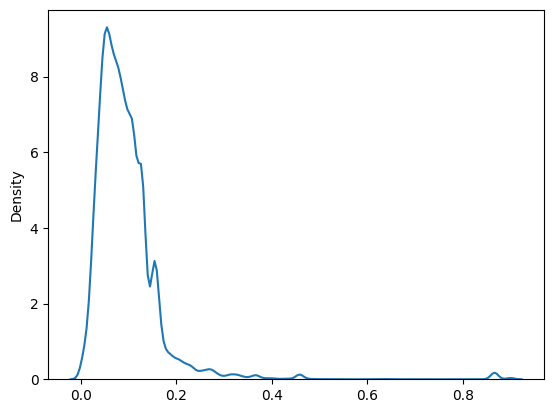

In [10]:
threshold(di_all)

In [1]:
import pandas as pd

In [2]:
adj_edge = pd.read_csv('feature_embedding/embedding-hmdd2/adj_edgelist.txt', delim_whitespace=True, header=None)
adj_edge_all = pd.read_csv('feature_embedding/embedding-hmdd2/adj_eagelist_all.txt', delim_whitespace=True, header=None)

In [3]:
adj_edge_all

,0,1
0,3,0
1,3,1
2,4,0
3,4,1
4,4,3
...,...,...
29422,876,827
29423,876,853
29424,876,874
29425,876,875


In [4]:
Edgelist_all = pd.concat([adj_edge, adj_edge_all], axis=0)

In [5]:
Edgelist_all

,0,1
0,383,0
1,383,36
2,383,49
3,383,53
4,383,58
...,...,...
29422,876,827
29423,876,853
29424,876,874
29425,876,875


In [6]:
Edgelist_all.to_csv('Edgelist_all.txt',sep='\t', header=False, index=False)